<a href="https://colab.research.google.com/github/SachinGupta7/TASEP/blob/main/MCEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Implementing Monte CarloAlgorithm to the system of 1D sphere.

> Function Half_dist calculates Var(u). It will be used in every method.

> Ring circumfrance is L and "ZERO" is our reference. particle lying toward left side of reference point is named CPL(closest point toward left)  and that lying toward right is named CPR(closest point toward left)

![Alt](https://github.com/SachinGupta7/TASEP/blob/main/1D%20Sphere.jpg?raw=True)


In [1]:
##importing Libraries
import numpy as np  
import matplotlib.pyplot as plt
from matplotlib import patches as pt
from tqdm import tqdm
from IPython.display import display


In [2]:
def initialize():   ##this function will provide Number of Particles,their Diameter and Density
    N = 100
    d = 0.4
    rho = 0.6
    return N,d,rho;

def index(k): 
    ##the reason for this function is - Let say we have N spheres, and in some case last element sphere(i.e. N-1 th) is selected 
    ##in some algorithm we need to find X_i+1 so indexing for this sphere will be Array[N-1+1] = Array[N] !!But it Array has only upto N-1 index so to avoid this condition, This function is Calculated
    ##when index is N-1, and X_i+1 = A[-1+1]  =A[0] . And the periodicity is satisfied 
    if(k==N-1):
        return -1;
    else: return k;

def Half_dist(H):  ## H is position array of spheres
    delta = np.zeros(N)  ##dummy array that will store delta_i for each sphere
    
    CPL = int(np.where(L-H==np.min(L-H))[0]) 
    CPR = int(np.where(H==np.min(H))[0]) 
    ################################3
    ####Populating dummy array
    for i in range(N):
        if(i==CPR):
            delta[i] = H[index(i)]+(L-H[index(i)-1]) -d
        else :
            delta[i] = H[i]-H[i-1]-d
    delta_2 = np.hstack((delta,delta))  # Stacking delta array horizontally.It will help to calculate u_i for each sphere 
    u = np.array([np.sum(delta_2[j:j+int(N/2.)]) for j in range(0,N)])  ##calculating u_i
    return np.var(u) 


    


## <center> Heat Bath Algorithm  </center> 

100%|██████████| 184206/184206 [00:08<00:00, 20662.01it/s]


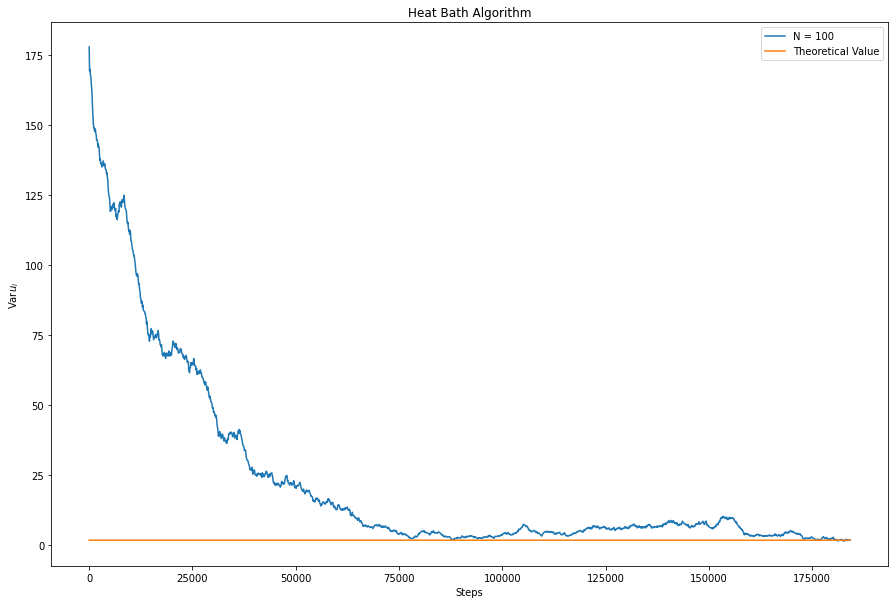

In [14]:
N,d,rho = initialize()

L = N*d/rho ##calculating the Circumfrance Length
l_free = (L-N*d)/float(N)
Sphere_Positions = d*np.arange(1,N+1)  ##this array will store Sphere positions, initial configuration is the compact one
Step = []  ##this array will store steps
Varu_List = []  ##this array will store VAR_ui
T_max = int((N**3)*np.log(N)*0.04)

################3
for t in tqdm(range(T_max )):  ##running the loop upto T_max
    pick_sphere = np.random.randint(0,N)  ##Sampling Sphere from i = 0,1, ,... , N-1  
 
    if(t%N==0):  ##we will store variance after N step
        Varu_List.append(Half_dist(Sphere_Positions))
        Step.append(t)
    
    CPL= int(np.where(L-Sphere_Positions==np.min(L-Sphere_Positions))[0]) 
    CPR = int(np.where(Sphere_Positions==np.min(Sphere_Positions))[0]) 
    if(pick_sphere==CPL or pick_sphere == CPR): 
        ##when selected sphere is CPL and CPR then new_positions may cross reference point 
        ##So that they should be treated separately
        new_pos = np.random.uniform(Sphere_Positions[index(pick_sphere)-1]+d,L+Sphere_Positions[index(pick_sphere)+1]-d)
        ##updating elements Positions with appropiate Periodic Boundary Condition
        if(new_pos>L):  ##if new_pos crosses L, then we to Subtract L from it so that it remains on the ring
            Sphere_Positions[pick_sphere] = new_pos-L  
        else:   ##otherwise leave it as it is
            Sphere_Positions[pick_sphere] = new_pos          
    else:      
        Sphere_Positions[pick_sphere] =np.random.uniform(Sphere_Positions[index(pick_sphere)-1]+d,Sphere_Positions[index(pick_sphere)+1]-d)
##plotting Graphs
Heat_Bath_Figure = plt.figure(figsize = (15,10)) 
plt.title("Heat Bath Algorithm")
plt.xlabel("Steps")  
plt.ylabel("Var" + r'$ u_i$') 
plt.plot(Step,Varu_List,label = "N = "+str (N))
Theory_Val = ((N*N*l_free*l_free)/(4*N+4))*np.ones(len(Step)) ##array for Theoretical Value
plt.plot(Step,Theory_Val,Label = "Theoretical Value")
plt.legend()
plt.show()

## <center> Sequential Heat Bath Algorithm  </center> 

100%|██████████| 184206/184206 [00:07<00:00, 24418.57it/s]


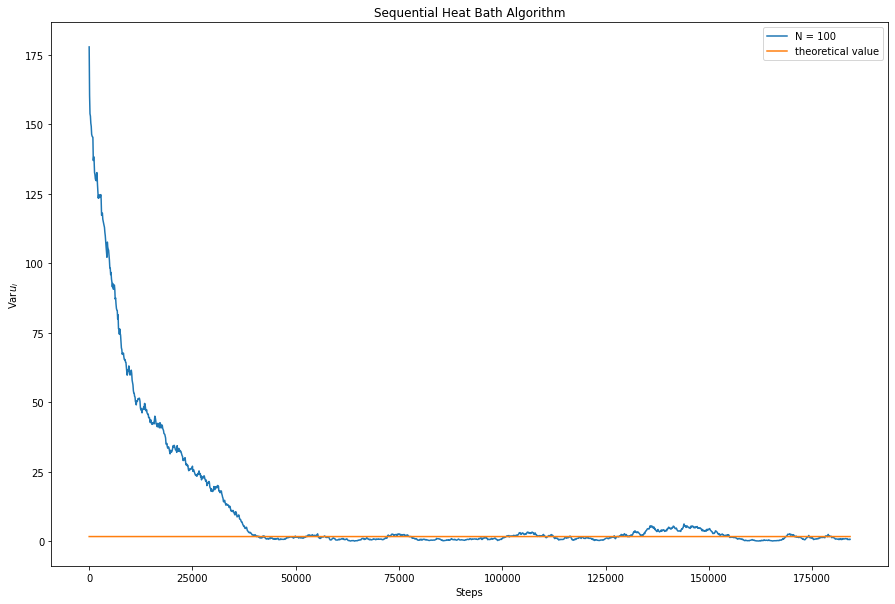

In [15]:
N,d,rho = initialize()

L = N*d/rho ##calculating the Circumfrance Length
l_free = (L-N*d)/float(N)
Sphere_Positions = d*np.arange(1,N+1)  ##this array will store Sphere positions, initial configuration is the compact one
Step = []  ##this array will store steps
Varu_List = []  ##this array will store VAR_ui
T_max = int((N**3)*np.log(N)*0.04)

################3
for t in tqdm(range(T_max )):  ##running the loop upto T_max
    pick_sphere =  int(t%N)  ##Sampling Sphere sequentially 
 
    if(t%N==0):  ##we will store variance after N step
        Varu_List.append(Half_dist(Sphere_Positions))
        Step.append(t)
    
    CPL= int(np.where(L-Sphere_Positions==np.min(L-Sphere_Positions))[0]) 
    CPR = int(np.where(Sphere_Positions==np.min(Sphere_Positions))[0]) 
    if(pick_sphere==CPL or pick_sphere == CPR): 
        ##when selected sphere is CPL and CPR then new_positions may cross reference point 
        ##So that they should be treated separately
        new_pos = np.random.uniform(Sphere_Positions[index(pick_sphere)-1]+d,L+Sphere_Positions[index(pick_sphere)+1]-d)
        ##updating elements Positions with appropiate Periodic Boundary Condition
        if(new_pos>L):  ##if new_pos crosses L, then we to Subtract L from it so that it remains on the ring
            Sphere_Positions[pick_sphere] = new_pos-L  
        else:   ##otherwise leave it as it is
            Sphere_Positions[pick_sphere] = new_pos          
    else:      
        Sphere_Positions[pick_sphere] =np.random.uniform(Sphere_Positions[index(pick_sphere)-1]+d,Sphere_Positions[index(pick_sphere)+1]-d)
##plotting Graphs
Heat_Bath_Seq_Figure = plt.figure(figsize = (15,10)) 
plt.title("Sequential Heat Bath Algorithm")
plt.xlabel("Steps")  
plt.ylabel("Var" + r'$ u_i$')
plt.plot(Step,Varu_List,label = "N = "+str (N))
Theory_Val = ((N*N*l_free*l_free)/(4*N+4))*np.ones(len(Step)) ##array for Theoretical Value
plt.plot(Step,Theory_Val,label = "theoretical value")
plt.legend()
plt.show()

## Compairing Heat Bath and Sequential Heat Bath



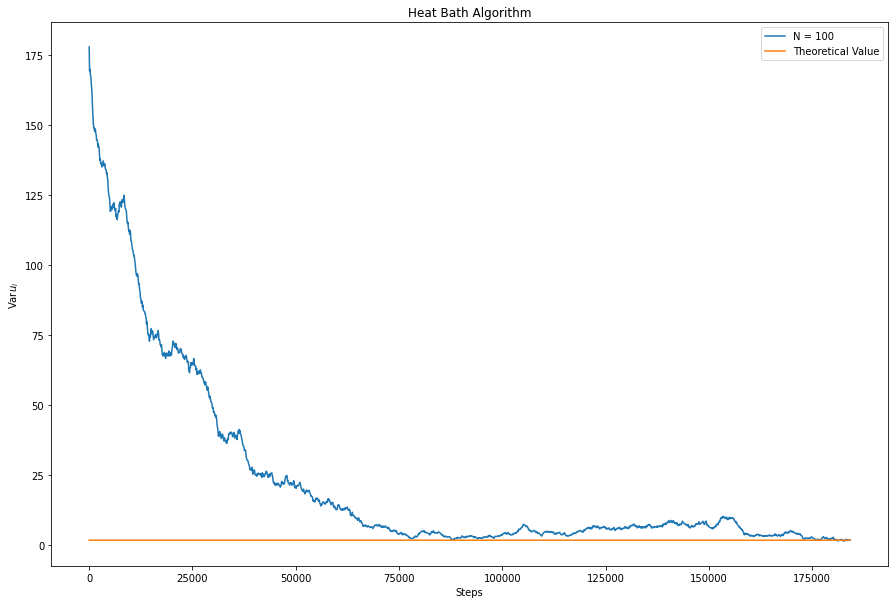

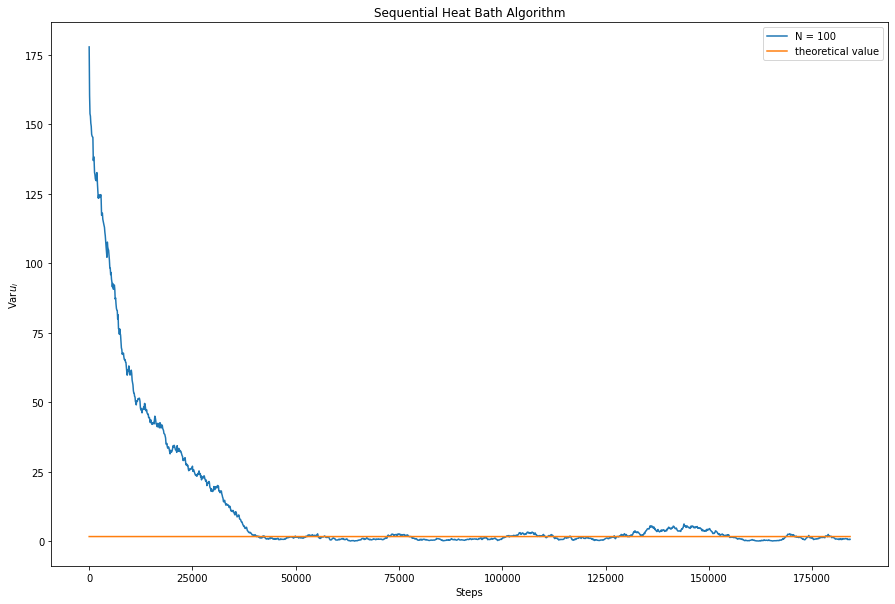

In [16]:
display(Heat_Bath_Figure,Heat_Bath_Seq_Figure)

## <center> Reversible Metropolis Algorithm </center>


100%|██████████| 1500000/1500000 [01:26<00:00, 17399.81it/s]


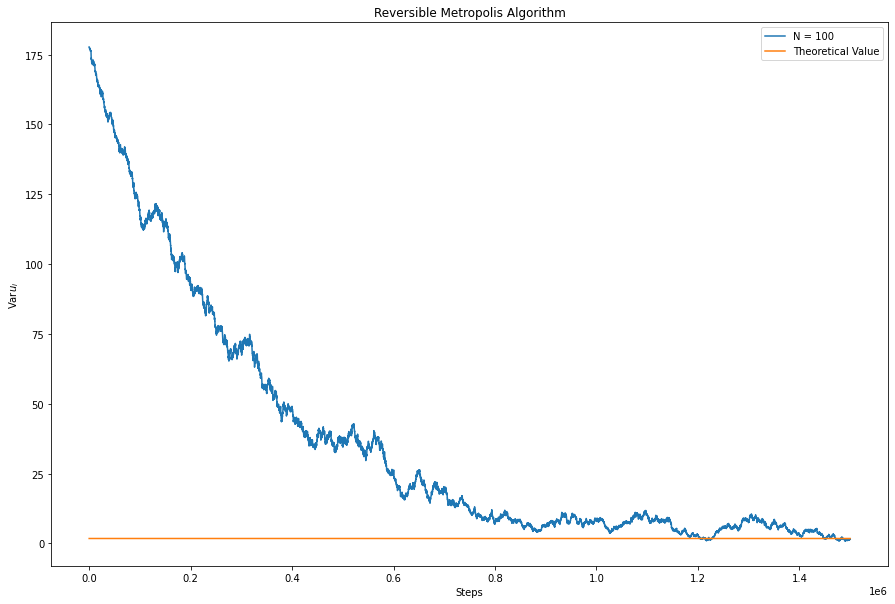

In [17]:
N,d,rho = initialize()

L = N*d/rho ##calculating the Circumfrance Length
l_free = (L-N*d)/float(N)
Sphere_Positions = d*np.arange(1,N+1)  ##this array will store Sphere positions, initial configuration is the compact one
Step = []  ##this array will store steps
Varu_List = []  ##this array will store VAR_ui
T_max = 1500000


for t in tqdm (range(T_max)):
    pick_sphere = np.random.randint(0,N)
    epsilon = np.random.uniform(low = 0,high = 2.5*l_free)  ##sampling epsilon
    sigma = np.random.choice([-1,1])  ##sampling directions
    if(t%N==0):
        Varu_List.append(Half_dist(Sphere_Positions))
        Step.append(t)

    new_pos = Sphere_Positions[pick_sphere] + sigma*epsilon
    CPL= int(np.where(L-Sphere_Positions==np.min(L-Sphere_Positions))[0]) 
    CPR = int(np.where(Sphere_Positions==np.min(Sphere_Positions))[0]) 
    if(pick_sphere==CPL):
        ## If CPL is selected then we add "L" to the position of next sphere((x_i+1)), so that periodic conditions is satisfied
        if(Sphere_Positions[index(pick_sphere)-1]+d<  new_pos  <L+Sphere_Positions[index(pick_sphere)+1]-d): ##acceptance condition
            ##updating position of sampled sphere
            if(new_pos>=L):  
                ##if new_pos surpasses reference point then l must be subtracted otherwise it remains as it is
                Sphere_Positions[pick_sphere] = new_pos-L
            else:
                Sphere_Positions[pick_sphere] = new_pos    
    elif(pick_sphere==CPL):
         ## If CPR is selected then we subtract  "L" to the position of previous sphere(x_i-1), so that periodic conditions is satisfied

        if((-L+Sphere_Positions[index(pick_sphere)-1]+d) < new_pos <Sphere_Positions[index(pick_sphere)+1]-d ): ##acceptance condition
            ####if new_pos is positive then it will be remained as it is
            if(new_pos>=0):
                Sphere_Positions[pick_sphere] = new_pos
            ##if it is negative then it will be updated towards left side of the reference point    
            else:
                Sphere_Positions[pick_sphere] = L+new_pos  
    
    else:  ##for non CPL and CPR sphere
        if(Sphere_Positions[index(pick_sphere)-1]+d< new_pos < Sphere_Positions[index(pick_sphere)+1]-d):##acceptance condition
            Sphere_Positions[pick_sphere]  = new_pos  ##Updating position


##plotting Graphs
Rev_Metro_Algo = plt.figure(figsize = (15,10)) 
plt.title("Reversible Metropolis Algorithm")
plt.xlabel("Steps")  
plt.ylabel("Var" + r'$ u_i$')
plt.plot(Step,Varu_List,label = "N = "+str (N))
Theory_Val = ((N*N*l_free*l_free)/(4*N+4))*np.ones(len(Step)) ##array for Theoretical Value
plt.plot(Step,Theory_Val,label = "Theoretical Value")
plt.legend()
plt.show()

    


# <center> Sequential Metropolis Algorithm </center>

100%|██████████| 1500000/1500000 [01:24<00:00, 17826.50it/s]


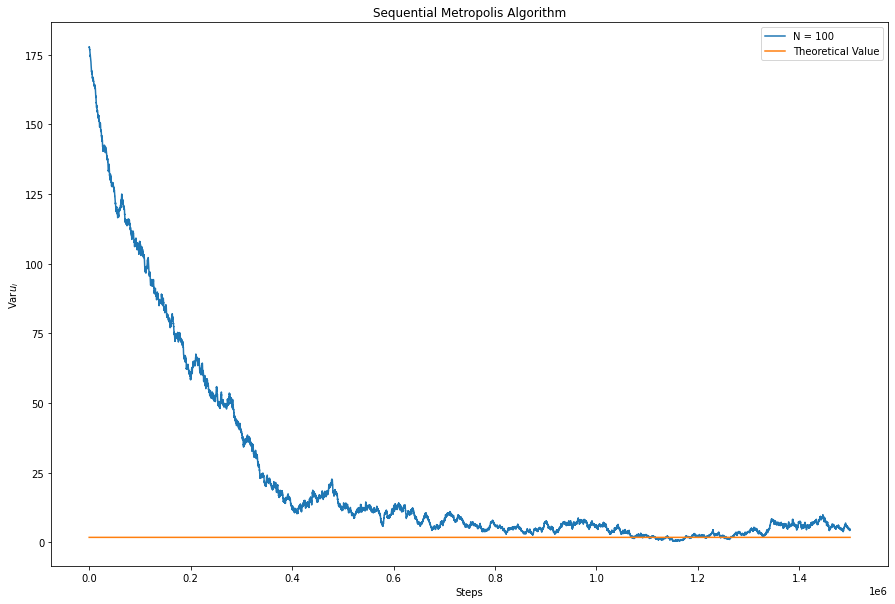

In [18]:
N,d,rho = initialize()

L = N*d/rho ##calculating the Circumfrance Length
l_free = (L-N*d)/float(N)
Sphere_Positions = d*np.arange(1,N+1)  ##this array will store Sphere positions, initial configuration is the compact one
Step = []  ##this array will store steps
Varu_List = []  ##this array will store VAR_ui
T_max = 1500000

for t in tqdm (range(T_max)):
    pick_sphere = int(t%N)  ##Sampling Sphere Sequentially
    epsilon = np.random.uniform(low = 0,high = 2.5*l_free)  ##sampling epsilon
    sigma = np.random.choice([-1,1])  ##sampling directions
    if(t%N==0):
        Varu_List.append(Half_dist(Sphere_Positions))
        Step.append(t)

    new_pos = Sphere_Positions[pick_sphere] + sigma*epsilon
    CPL= int(np.where(L-Sphere_Positions==np.min(L-Sphere_Positions))[0]) 
    CPR = int(np.where(Sphere_Positions==np.min(Sphere_Positions))[0]) 


    ################################################################
    ###Condition for updating new positions (Same as Reversible Metropolis )
    ################################################################
    if(pick_sphere==CPL):
        ## If CPL is selected then we add "L" to the position of next sphere((x_i+1)), so that periodic conditions is satisfied
        if(Sphere_Positions[index(pick_sphere)-1]+d<  new_pos  <L+Sphere_Positions[index(pick_sphere)+1]-d): ##acceptance condition
            ##updating position of sampled sphere
            if(new_pos>=L):  
                ##if new_pos surpasses reference point then l must be subtracted otherwise it remains as it is
                Sphere_Positions[pick_sphere] = new_pos-L
            else:
                Sphere_Positions[pick_sphere] = new_pos    
    elif(pick_sphere==CPL):
         ## If CPR is selected then we subtract  "L" to the position of previous sphere(x_i-1), so that periodic conditions is satisfied

        if((-L+Sphere_Positions[index(pick_sphere)-1]+d) < new_pos <Sphere_Positions[index(pick_sphere)+1]-d ): ##acceptance condition
            ####if new_pos is positive then it will be remained as it is
            if(new_pos>=0):
                Sphere_Positions[pick_sphere] = new_pos
            ##if it is negative then it will be updated towards left side of the reference point    
            else:
                Sphere_Positions[pick_sphere] = L+new_pos  
    
    else:  ##for non CPL and CPR sphere
        if(Sphere_Positions[index(pick_sphere)-1]+d< new_pos < Sphere_Positions[index(pick_sphere)+1]-d):##acceptance condition
            Sphere_Positions[pick_sphere]  = new_pos  ##Updating position


Rev_Metro_Seq_Algo = plt.figure(figsize = (15,10)) 
plt.title("Sequential Metropolis Algorithm")
plt.xlabel("Steps")  
plt.ylabel("Var" + r'$ u_i$')
plt.plot(Step,Varu_List,label = "N = "+str (N))
Theory_Val = ((N*N*l_free*l_free)/(4*N+4))*np.ones(len(Step)) ##array for Theoretical Value
plt.plot(Step,Theory_Val,label = "Theoretical Value")
plt.legend()
plt.show()


# <center> Forward Metropolis Algorithm </center>

100%|██████████| 150000/150000 [00:06<00:00, 22392.61it/s]


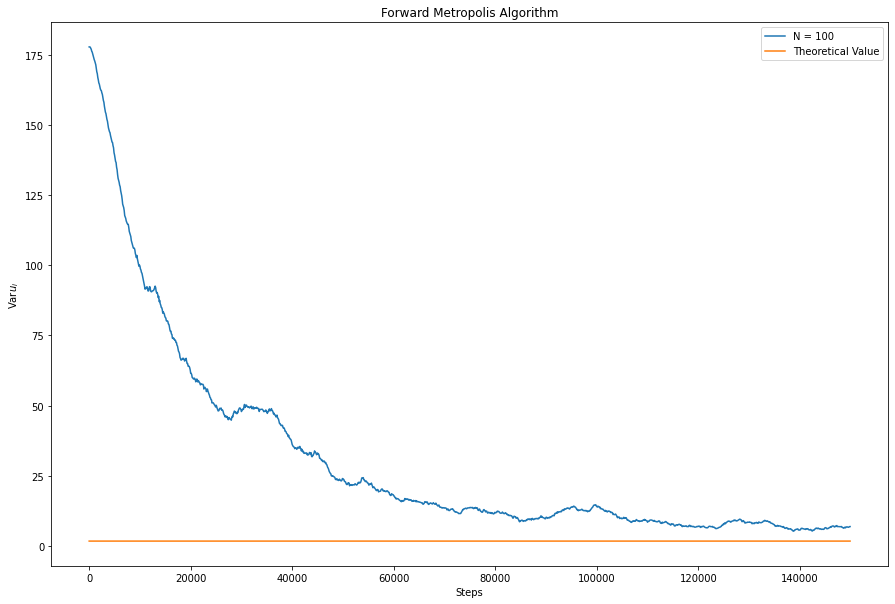

In [19]:
def periodic_auxy(c,p_sp):
    ##The rule of this function is to avoid writing if/else condition 
    ## When CPL is selected then for moving it forward we add L to next sphere (because next sphere will be toward Right side of Reference point)
    ##it will become clear while going through the loop
    if(c==p_sp):
        return 1;
    else:
        return 0;    

N,d,rho = initialize()
L = N*d/rho ##calculating the Circumfrance Length
l_free = (L-N*d)/float(N)
Sphere_Positions = d*np.arange(1,N+1)  ##this array will store Sphere positions, initial configuration is the compact one
Step = []  ##this array will store steps
Varu_List = []  ##this array will store VAR_ui
T_max = 1500000
for t in tqdm(range(T_max )):
    pick_sphere = np.random.randint(0,N)  ##picking sphere at random
    epsilon = np.random.uniform(0,2.5*l_free) ##sampling epsilon value
    
    if(t%N==0):   ##updating arrays after N steps
        Varu_List.append(Half_dist(Sphere_Positions))
        Step.append(t)

    new_pos = Sphere_Positions[pick_sphere] + epsilon  ##because this time sphere can move in forward direction only

    CPL= int(np.where(L-Sphere_Positions==np.min(L-Sphere_Positions))[0]) 
    ##this time we only need CPL, cuz spheres are moving toward forward directions only 

    if(new_pos< L*(periodic_auxy(CPL,pick_sphere))+Sphere_Positions[index(pick_sphere)+1]-d):  ##Acceptance condition (L is added to satisfy periodic Boundary Condition)
    ###in upper condition the extra term L*(periodic_auxy(cpi,pick_sphere)) is for when Selected particle is CPL
        if(new_pos>=L):
            Sphere_Positions[pick_sphere] = new_pos-L  ##updatig new position , if new position surpasses reference point , so L is subtracted
        else:
            Sphere_Positions[pick_sphere] = new_pos    


Forwar_Metro_Algo = plt.figure(figsize = (15,10)) 
plt.title("Forward Metropolis Algorithm")
plt.xlabel("Steps")  
plt.ylabel("Var" + r'$ u_i$')
plt.plot(Step,Varu_List,label = "N = "+str (N))
Theory_Val = ((N*N*l_free*l_free)/(4*N+4))*np.ones(len(Step)) ##array for Theoretical Value
plt.plot(Step,Theory_Val,label = "Theoretical Value")
plt.legend()

plt.show()

    


# <center> Lifted Metropolis Algorithm withoust Restart </center>

100%|██████████| 150000/150000 [00:05<00:00, 27725.98it/s]


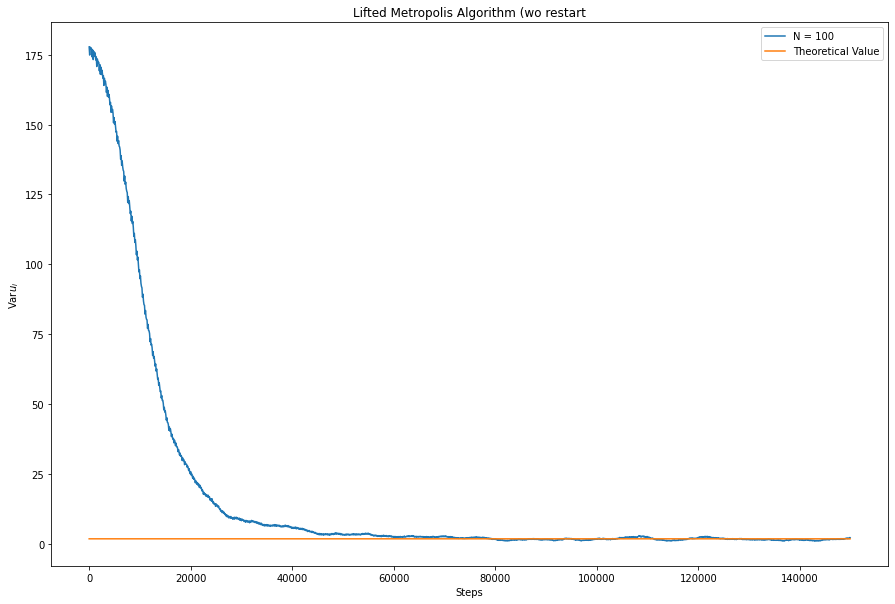

In [20]:
def periodic_auxy(c,p_sp):
    ##The rule of this function is to avoid writing if/else condition 
    ## When CPL is selected then for moving it forward we add L to next sphere (because next sphere will be toward Right side of Reference point)
    ##it will become clear while going through the loop
    if(c==p_sp):
        return 1;
    else:
        return 0;    
N,d,rho = initialize()
L = N*d/rho ##calculating the Circumfrance Length
l_free = (L-N*d)/float(N)
Sphere_Positions = d*np.arange(1,N+1)  ##this array will store Sphere positions, initial configuration is the compact one
Step = []  ##this array will store steps
Varu_List = []  ##this array will store VAR_ui
T_max = 150000
pick_sphere  =  np.random.randint(0,N)
for t in tqdm(range(T_max )):
   
    epsilon = np.random.uniform(0,2.5*l_free)  ##sampling epsilon

    if(t%N==0):   ##updating arrays after N steps
        Varu_List.append(Half_dist(Sphere_Positions))
        Step.append(t)    

    new_pos = Sphere_Positions[pick_sphere]+epsilon
    CPL = int(np.where(L-Sphere_Positions==np.min(L-Sphere_Positions))[0]) 

    if(new_pos< L*(periodic_auxy(CPL,pick_sphere))+Sphere_Positions[index(pick_sphere)+1]-d):  ##Acceptance condition (L is added to satisfy periodic Boundary Condition)
    ###in upper condition the extra term L*(periodic_auxy(cpi,pick_sphere)) is for when Selected particle is CPL
        if(new_pos>=L):
            Sphere_Positions[pick_sphere] = new_pos-L  ##updatig new position , if new position surpasses reference point , so L is subtracted
        else:
            Sphere_Positions[pick_sphere] = new_pos    

                
    else:  ##if the move is not made then the we lifted the sphere i.e. select next sphere
        pick_sphere  = int((pick_sphere + 1)%N)        



Lifted_Metro_Algo_wor = plt.figure(figsize = (15,10)) 
plt.title("Lifted Metropolis Algorithm (wo restart")
plt.xlabel("Steps")  
plt.ylabel("Var" + r'$ u_i$')
plt.plot(Step,Varu_List,label = "N = "+str (N))
Theory_Val = ((N*N*l_free*l_free)/(4*N+4))*np.ones(len(Step)) ##array for Theoretical Value
plt.plot(Step,Theory_Val,label = "Theoretical Value")
plt.legend()

plt.show()
    

# <center> Lifted Metropolis with **RESTART**($\lambda \approx N$) </center>

100%|██████████| 500/500 [00:01<00:00, 289.10it/s]


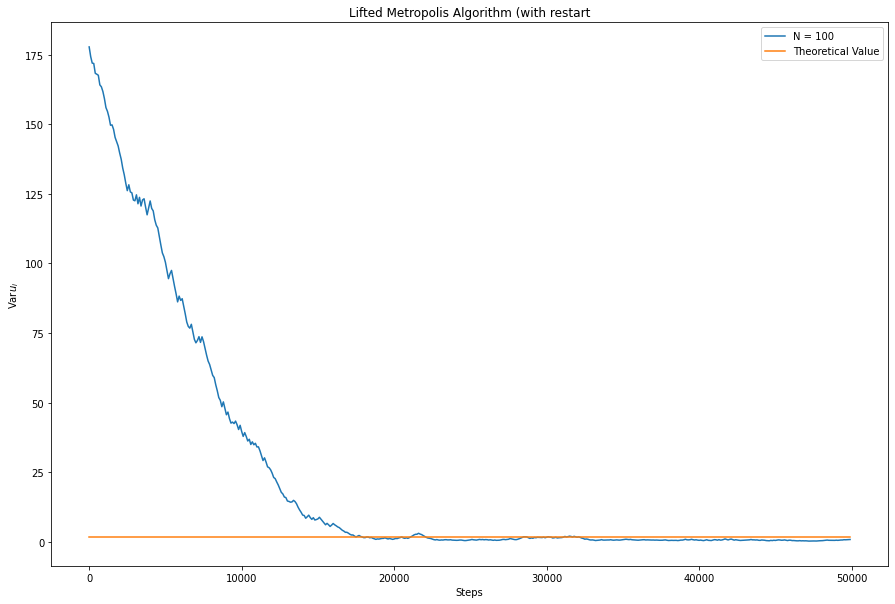

In [3]:
def periodic_auxy(c,p_sp):
    ##The rule of this function is to avoid writing if/else condition 
    ## When CPL is selected then for moving it forward we add L to next sphere (because next sphere will be toward Right side of Reference point)
    ##it will become clear while going through the loop
    if(c==p_sp):
        return 1;
    else:
        return 0;    
N,d,rho = initialize()
L = N*d/rho ##calculating the Circumfrance Length
l_free = (L-N*d)/float(N)
Sphere_Positions = d*np.arange(1,N+1)  ##this array will store Sphere positions, initial configuration is the compact one
Step = []  ##this array will store steps
Varu_List = []  ##this array will store VAR_ui
C_max = 500  ## for each c , loop will run lambda times

for c in tqdm(range(C_max )):  
    Lambda = N  ##Sampling Lambda
    pick_sphere  =  np.random.randint(0,N)   ##Sampling Sphere

 
    for m in range(Lambda):
        if(m==0):  
            ####updating arrays after N steps
            Varu_List.append(Half_dist(Sphere_Positions))
            Step.append(c*Lambda+m)      
        epsilon = np.random.uniform(0,2.5*l_free)  ##uniformally sampling epsilon      
        new_pos = Sphere_Positions[pick_sphere]+epsilon  ##calculating new posittions
    
        CPL =  int(np.where(L-Sphere_Positions==np.min(L-Sphere_Positions))[0])    ##Closest point toward left side of the reference

        if(new_pos< L*(periodic_auxy(CPL,pick_sphere))+Sphere_Positions[index(pick_sphere)+1]-d):  ##Acceptance condition (L is added to satisfy periodic Boundary Condition)
        ###in upper condition the extra term L*(periodic_auxy(cpi,pick_sphere)) is for when Selected particle is CPL
            if(new_pos>=L):
                Sphere_Positions[pick_sphere] = new_pos-L  ##updatig new position , if new position surpasses reference point , so L is subtracted
            else:
                Sphere_Positions[pick_sphere] = new_pos    

                    
        else:  ##if the move is not made then the we lifted the sphere i.e. select next sphere
            pick_sphere  = int((pick_sphere + 1)%N)        



Lifted_Metro_Algo_rest = plt.figure(figsize = (15,10)) 
plt.title("Lifted Metropolis Algorithm (with restart")
plt.xlabel("Steps")  
plt.ylabel("Var" + r'$ u_i$')
plt.plot(Step,Varu_List,label = "N = "+str (N))
Theory_Val = ((N*N*l_free*l_free)/(4*N+4))*np.ones(len(Step)) ##array for Theoretical Value
plt.plot(Step,Theory_Val,label = "Theoretical Value")
plt.legend()
plt.show()
    

In [29]:
Varu_List

[177.7777777777778,
 177.6050295054343,
 174.41350477883253,
 170.91137394806407,
 167.57224201544915,
 167.10746746810625,
 164.69426233398252,
 161.4400920607691,
 158.45669159945984,
 155.601600235177,
 152.78766058743665,
 150.34291001816635,
 147.1066337574165,
 149.82910598120407,
 147.92084754276357]

# <center> Event Chain Monte Carlo (ECMC) </center>

100%|██████████| 400/400 [00:00<00:00, 417.06it/s]


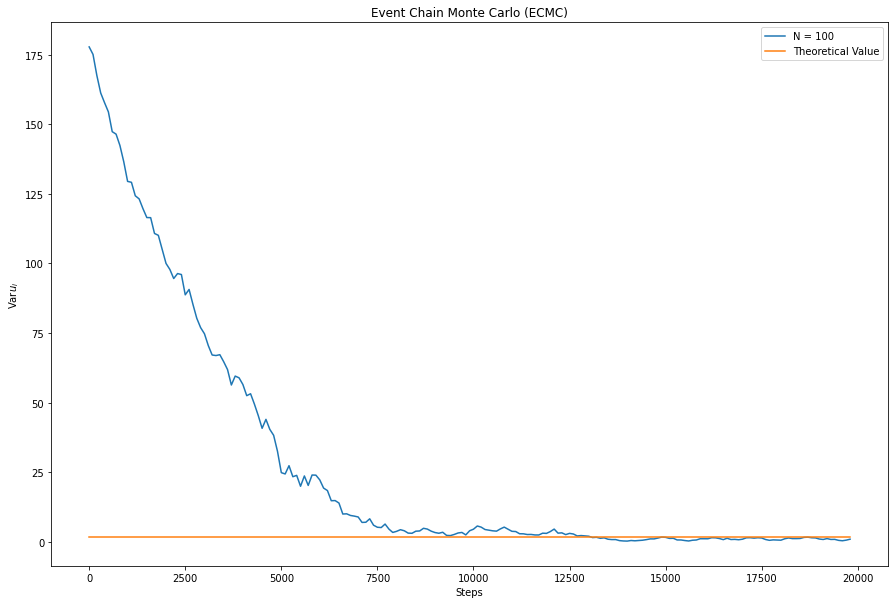

In [22]:
def periodic_auxy(c,p_sp):
    ##The rule of this function is to avoid writing if/else condition 
    ## When CPL is selected then for moving it forward we add L to next sphere (because next sphere will be toward Right side of Reference point)
    ##it will become clear while going through the loop
    if(c==p_sp):
        return 1;
    else:
        return 0;    
N,d,rho = initialize()  ##getting initial value from the function 
L = N*d/rho ##calculating the Circumfrance Length
l_free = (L-N*d)/float(N)  # mean distance between two particle
Sphere_Positions = d*np.arange(1,N+1)  ##this array will store Sphere positions, initial configuration is the compact one
Step = []  ##this array will store steps
Varu_List = []  ##this array will store VAR_ui

C_max = 400 ## for each c , we will run an infinite while loop untill l becomes negative
m = 0  ##this number will help us to track number of step


for c in tqdm(range(C_max) ):  

    l = np.random.uniform(0*(L-N*d),1.*L-N*d)  ##sampling l 
    pick_sphere  =  np.random.randint(0,N)   ##Sampling Sphere
   
    while l>0:          
        if(m%N==0):  
            ####updating arrays after N steps
            Varu_List.append(Half_dist(Sphere_Positions))
            Step.append(m)  
        
        CPL =  int(np.where(L-Sphere_Positions==np.min(L-Sphere_Positions))[0])    ##Closest point toward left side of the reference
        delta = np.min([(L*periodic_auxy(CPL,pick_sphere) + Sphere_Positions[index(pick_sphere)+1]-Sphere_Positions[index(pick_sphere)]-d),l]) 
        ##L*periodic_auxy(CPL,pick_sphere) term is because of periodic boundary condition
        ###in upper condition the extra term L*(periodic_auxy(cpi,pick_sphere)) is for when Selected particle is CPL
        
        new_pos = Sphere_Positions[pick_sphere]+delta  ##calculating new positions, we haven't uploaded the actual position yet
        #we have to check the following
        if(new_pos>=L):
            ##if it exceeds L , the L should be subtracted or remain as it is

            Sphere_Positions[pick_sphere] = new_pos-L
        else:

            Sphere_Positions[pick_sphere] = new_pos
 
        l = l-delta  ##subtracting delta from l 
        pick_sphere = int((pick_sphere+1)%N)   #updating sampled sphere
        m += 1 ##updating step number
        
   


ECMC = plt.figure(figsize = (15,10)) 
plt.title("Event Chain Monte Carlo (ECMC)")
plt.xlabel("Steps")  
plt.ylabel("Var" + r'$ u_i$')
plt.plot(Step,Varu_List,label = "N = "+str (N))
Theory_Val = ((N*N*l_free*l_free)/(4*N+4))*np.ones(len(Step)) ##array for Theoretical Value

plt.plot(Step,Theory_Val,label = "Theoretical Value")
plt.legend()
plt.show()
    

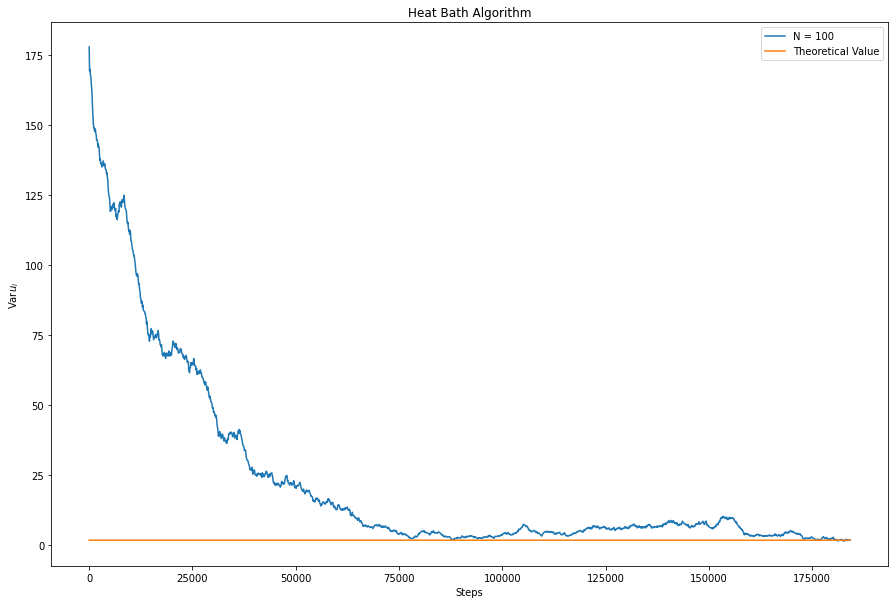

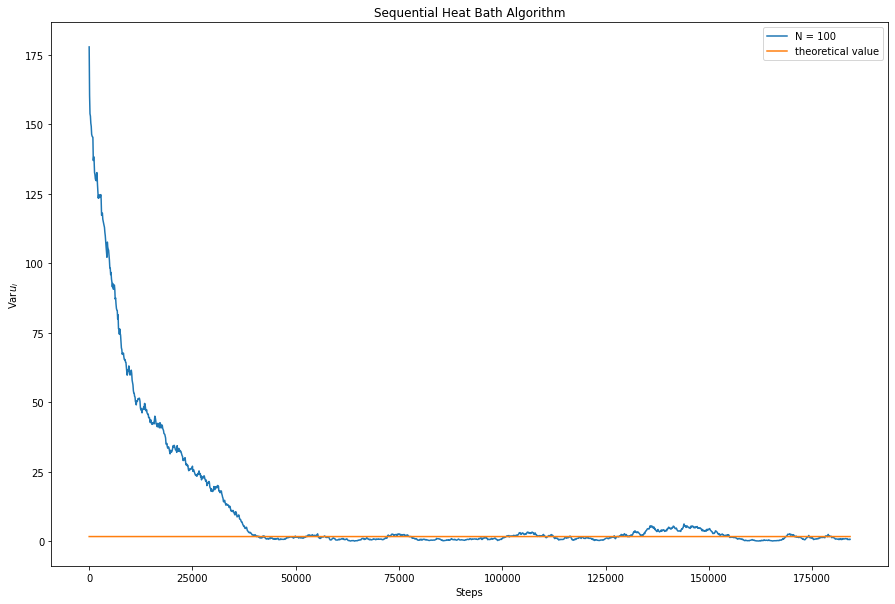

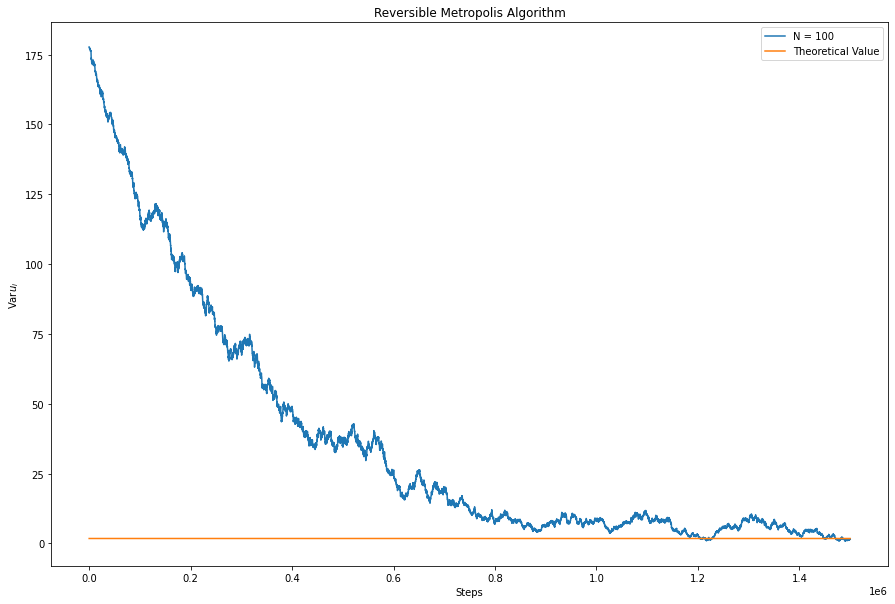

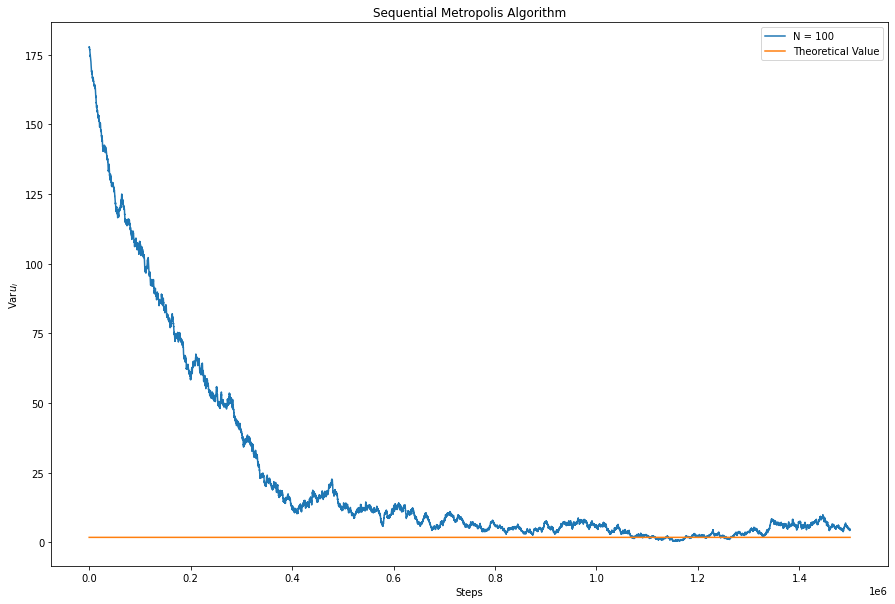

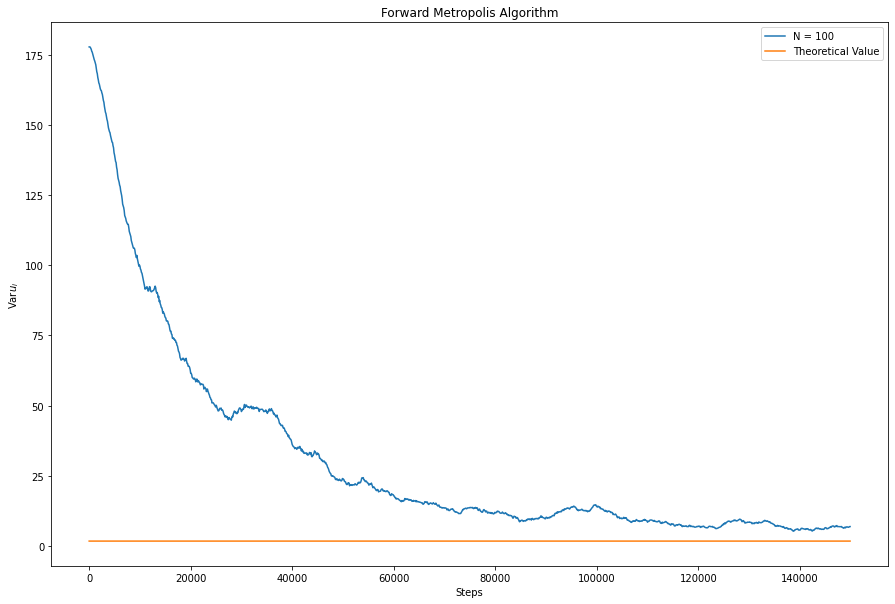

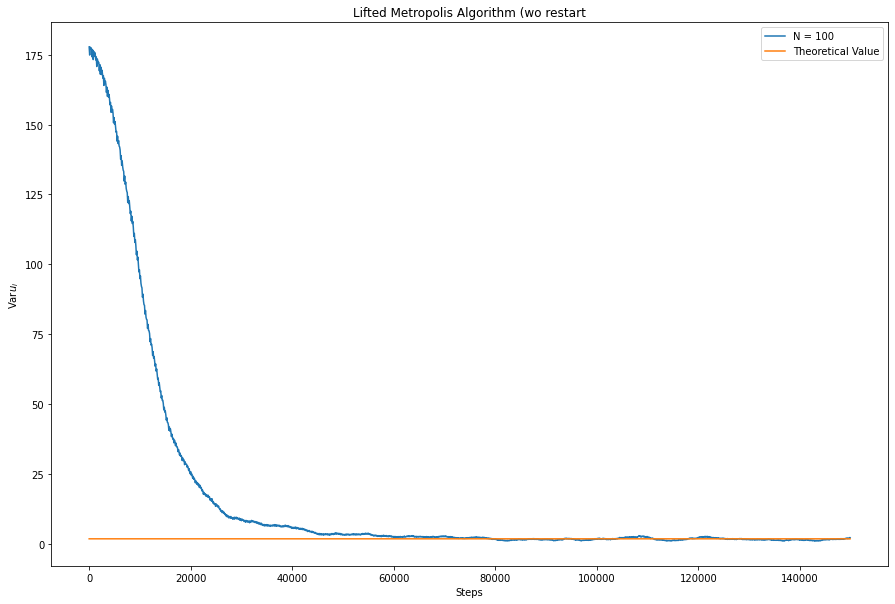

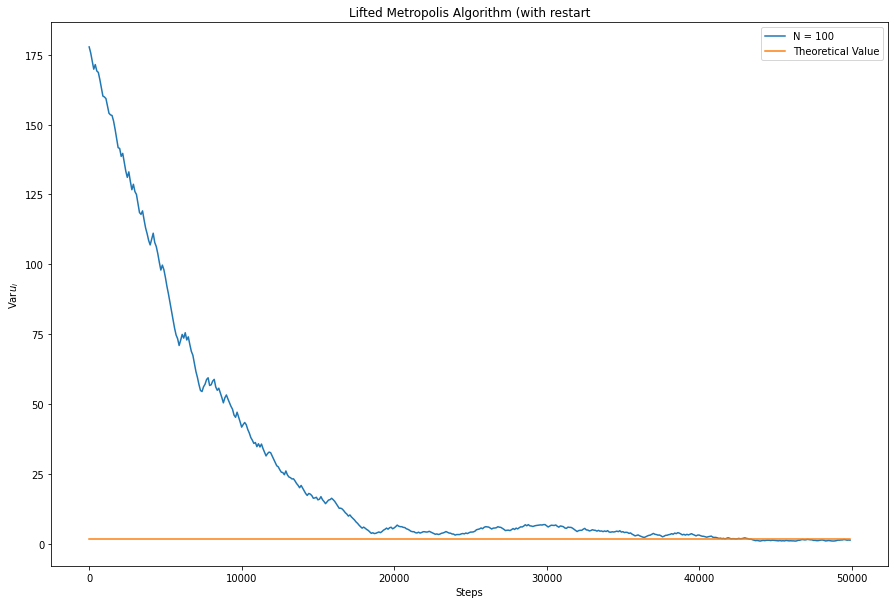

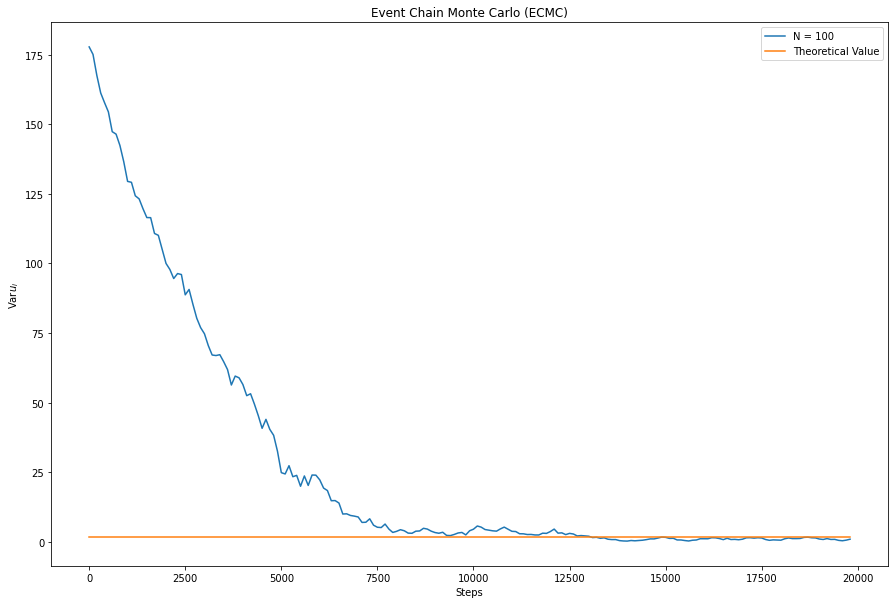

In [34]:
display(Heat_Bath_Figure,Heat_Bath_Seq_Figure,Rev_Metro_Algo,Rev_Metro_Seq_Algo,Forwar_Metro_Algo,Lifted_Metro_Algo_wor,Lifted_Metro_Algo_rest,ECMC)